# PARTE I: Correlaciones
Comenzamos por indagar si existe una correlación entre los parámetros socioeconómicos de Jalisco que seleccionamos y el número de casos de dengue. El MIDE se encarga de sondear indicadores socieconómicos del estado. Los datos que usamos corresponden al año 2010. Los características socioeconómicas que empleamos para construir nuestros modelos de aprendizaje supervisado y no supervisado son:
* Pobreza extrema, `Pobreza`.
* Porcentaje de cobertura de servicio de agua potable, `AguaPotable`.  Las personas que viven en regiones que no cuentan con el servicio de agua potable tienen que almacenar el agua en cubetas u otros recipientes. El problema surge cuando estos no tienen cubiertas, pues esto permite a los mosquitos depositar sus huevos ahí.   
* Número de habitantes por vivienda promedio `promedio_habsxviv`. (El número de habitantes por vivienda promedio se obtuvo del Censo de Población y Vivienda 2010, levantado por el Instituto Nacional de Estadística y Geografía (INEGI)). En algunos lugares el agua llegua a los hogares unos pocos días por semana, por lo que necesitan aprovisionarla. La cantidad de agua que aparten dependerá del número de personas que habiten ahí.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_xlsx=pd.read_excel('datos/indicadoressocioeconomicos.xlsx', 'Sheet1')
data_xlsx.to_csv('datos/indicadoressocioeconomicos.csv', encoding='utf-8', index=False)
df1=pd.read_csv('datos/indicadoressocioeconomicos.csv')
df1

,Municipio,Poblacion,Pobreza,AguaPotable,Casos,casosxmilhabs
0,ACATIC,21206,10.42,79.73,0,0.000000
1,ACATLÁN DE JUÁREZ,23241,2.18,97.68,5,0.215137
2,AHUALULCO DE MERCADO,21714,3.78,98.27,0,0.000000
3,AMACUECA,5545,5.50,98.55,1,0.180343
4,AMATITÁN,14648,3.23,95.39,0,0.000000
...,...,...,...,...,...,...
120,ZAPOTILTIC,29192,3.87,98.71,7,0.239792
121,ZAPOTITLÁN DE VADILLO,6685,20.00,98.10,2,0.299177
122,ZAPOTLÁN DEL REY,17585,7.87,98.03,0,0.000000
123,ZAPOTLÁN EL GRANDE,100534,1.45,98.75,6,0.059681


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Municipio      125 non-null    object 
 1   Poblacion      125 non-null    int64  
 2   Pobreza        125 non-null    float64
 3   AguaPotable    125 non-null    float64
 4   Casos          125 non-null    int64  
 5   casosxmilhabs  125 non-null    float64
dtypes: float64(3), int64(2), object(1)
memory usage: 6.0+ KB


In [4]:
df1.describe()

,Poblacion,Pobreza,AguaPotable,Casos,casosxmilhabs
count,1.250000e+02,125.00000,125.000000,125.000000,125.000000
mean,5.634554e+04,9.51992,89.448240,9.368000,0.225639
std,1.839120e+05,6.33529,11.774872,31.136157,0.566235
min,2.082000e+03,1.45000,38.910000,0.000000,0.000000
25%,6.685000e+03,5.31000,87.240000,0.000000,0.000000
50%,1.732200e+04,7.42000,93.500000,0.000000,0.000000
75%,3.418200e+04,12.02000,97.080000,3.000000,0.120602
max,1.495189e+06,40.68000,99.510000,236.000000,3.152230


## Porcentaje de pobreza extrema

[Text(0, 0.5, 'Casos de dengue por cada mil habs.'),
 Text(0.5, 0, 'Porcentaje de pobreza extrema')]

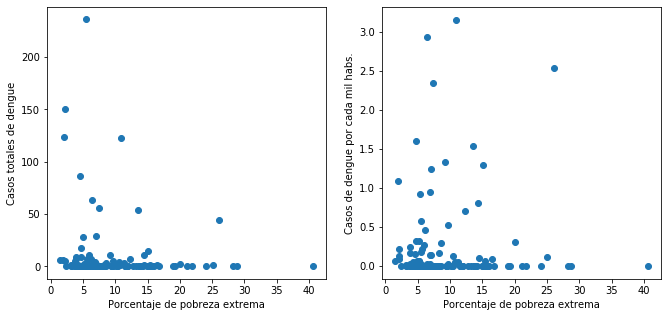

In [5]:
f, (ax1, ax2)=plt.subplots(1,2, figsize=(11,5))
ax1.scatter(df1['Pobreza'], df1['Casos'])
ax1.set(xlabel='Porcentaje de pobreza extrema', ylabel='Casos totales de dengue')
ax2.scatter(df1['Pobreza'], df1['casosxmilhabs'])
ax2.set(xlabel='Porcentaje de pobreza extrema', ylabel='Casos de dengue por cada mil habs.')

En esta gráfica observamos que no hay una correlación entre la pobreza de un municipio y el número de casos de dengue. Por otra parte, podemos ver que los municipios con mayor número de casos de dengue tienen un porcentaje de pobreza extrema bajo de entre 5 y 15 %.

## Porcentaje de cobertura del servicio de agua potable

[Text(0, 0.5, 'Casos de dengue por cada mil habs.'),
 Text(0.5, 0, 'Porcentaje de cobertura del servicio de agua potable')]

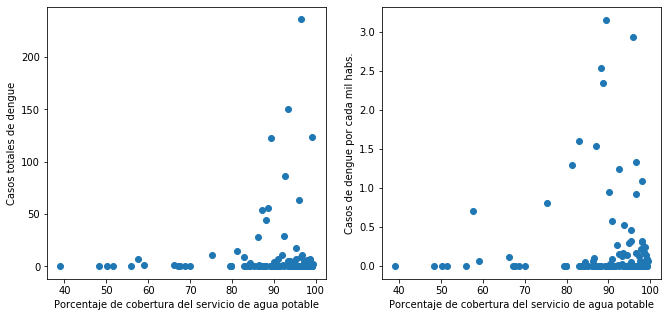

In [6]:
f, (ax1, ax2)=plt.subplots(1,2, figsize=(11,5))
ax1.scatter(df1['AguaPotable'], df1['Casos'])
ax1.set(xlabel='Porcentaje de cobertura del servicio de agua potable', ylabel='Casos totales de dengue')
ax2.scatter(df1['AguaPotable'], df1['casosxmilhabs'])
ax2.set(xlabel='Porcentaje de cobertura del servicio de agua potable', ylabel='Casos de dengue por cada mil habs.')

En las gráficas anteriores observamos que tampoco existe una correlación entre el número de casos de dengue y el servicio de agua potable. Sin embargo, vemos que los municipios donde hay un mayor número de casos son aquellos municipios donde la cobertura de dicho servicio es alta, como podemos apreciar, del 80 al 100%.

In [7]:
from mpl_toolkits.mplot3d import Axes3D #para hacer un gráfico en 3D

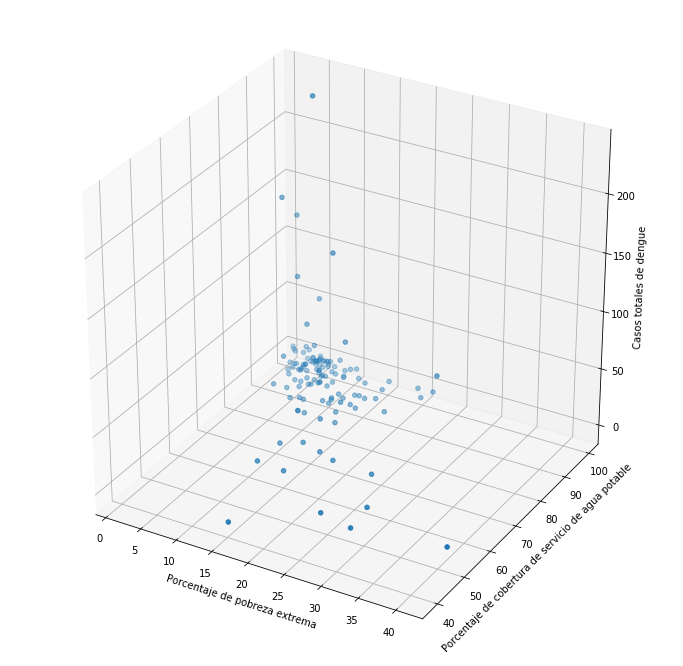

In [8]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(df1['Pobreza'],df1['AguaPotable'],df1['Casos'])
ax.set_xlabel('Porcentaje de pobreza extrema')
ax.set_ylabel('Porcentaje de cobertura de servicio de agua potable')
ax.set_zlabel('Casos totales de dengue')

plt.show()

En este gráfico juntamos la información de las dos figuras anteriores. Observamos que el mayor número de casos de dengue se encuentra en los municipios más desarrollados de Jalisco, es decir, donde el porcentaje de pobreza extrema es menor al 15% y la cobertura del servición de agua potable es mayor al 80%.

## Número de ocupantes por vivienda

Se consultó en el Censo de Población y Vivienda 2010, levantado por el Instituto Nacional de Estadística y Geografía (INEGI), el número de ocupantes por vivienda particular en el estado de Jalisco, por municipios.

In [9]:
data_xlsx=pd.read_excel('datos/ocupantesxvivienda.xlsx', 'Hoja1')
data_xlsx.to_csv('datos/ocupantesxvivienda.csv', encoding='utf-8', index=False)
df2=pd.read_csv('datos/ocupantesxvivienda.csv')
df2

,municipio,1ocupante,2ocupantes,3ocupantes,4ocupantes,5ocupantes,6ocupantes,7ocupantes,8ocupantes,9ymasocupantes,viviendas_totales,promedio_habsxviv,entre1y3ocupantes,entre4y6ocupantes,7omasocupantes,Casos,casosxmilhabs
0,Acatic,434,798,967,1075,901,540,292,131,115,5253,4.017323,2199,2516,538,0,0.000000
1,Acatlán de Juárez,406,759,966,1175,1058,535,220,101,127,5347,4.023378,2131,2768,448,5,0.215137
2,Ahualulco de Mercado,533,921,1033,1230,1022,507,216,102,78,5642,3.824176,2487,2759,396,0,0.000000
3,Amacueca,150,238,230,282,247,134,63,35,30,1409,3.885025,618,663,128,1,0.180343
4,Amatitán,222,448,548,776,700,391,188,90,86,3449,4.210496,1218,1867,364,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,Zapotiltic,774,1159,1307,1644,1383,654,264,157,153,7495,3.857105,3240,3681,574,7,0.239792
121,Zapotitlán de Vadillo,210,274,236,296,245,168,86,50,75,1640,4.000000,720,709,211,2,0.299177
122,Zapotlán del Rey,352,673,754,914,784,435,207,105,115,4339,4.026273,1779,2133,427,0,0.000000
123,Zapotlán el Grande,2096,3778,4603,5620,4367,2023,871,519,701,24578,3.925136,10477,12010,2091,6,0.059681


In [10]:
df2.describe()

,1ocupante,2ocupantes,3ocupantes,4ocupantes,5ocupantes,6ocupantes,7ocupantes,8ocupantes,9ymasocupantes,viviendas_totales,promedio_habsxviv,entre1y3ocupantes,entre4y6ocupantes,7omasocupantes,Casos,casosxmilhabs
count,125.000000,125.000000,125.000000,125.000000,125.00000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000,125.000000
mean,1259.520000,2225.152000,2614.136000,3134.480000,2498.20800,1331.688000,605.640000,318.528000,423.096000,14410.448000,3.902158,6098.808000,6964.376000,1347.264000,9.368000,0.225639
std,4094.654758,7331.525717,8528.704108,10197.894847,7821.91892,4058.868543,1800.142156,962.362018,1395.457922,46042.729765,0.277000,19932.177711,22065.348567,4154.408294,31.136157,0.566235
min,66.000000,114.000000,94.000000,100.000000,76.00000,37.000000,16.000000,10.000000,10.000000,584.000000,3.149538,296.000000,216.000000,40.000000,0.000000,0.000000
25%,218.000000,344.000000,319.000000,322.000000,264.00000,163.000000,82.000000,44.000000,37.000000,1721.000000,3.694989,908.000000,709.000000,162.000000,0.000000,0.000000
50%,412.000000,694.000000,738.000000,870.000000,709.00000,435.000000,203.000000,100.000000,96.000000,4167.000000,3.920261,1821.000000,2015.000000,395.000000,0.000000,0.000000
75%,747.000000,1273.000000,1335.000000,1644.000000,1413.00000,785.000000,397.000000,205.000000,268.000000,8149.000000,4.079436,3320.000000,3738.000000,836.000000,3.000000,0.120602
max,35371.000000,61129.000000,68507.000000,78565.000000,60304.00000,32167.000000,14720.000000,8088.000000,11602.000000,370453.000000,4.687433,165007.000000,171036.000000,34410.000000,236.000000,3.152230


A continuación añadimos al DataFrame de características socioeconómicas el promedio de habitantes por vivienda, que es la variable `promedio_habsxviv`.

In [11]:
df3 = pd.concat([df1, df2['promedio_habsxviv']], axis=1, sort=False) 

In [12]:
df3

,Municipio,Poblacion,Pobreza,AguaPotable,Casos,casosxmilhabs,promedio_habsxviv
0,ACATIC,21206,10.42,79.73,0,0.000000,4.017323
1,ACATLÁN DE JUÁREZ,23241,2.18,97.68,5,0.215137,4.023378
2,AHUALULCO DE MERCADO,21714,3.78,98.27,0,0.000000,3.824176
3,AMACUECA,5545,5.50,98.55,1,0.180343,3.885025
4,AMATITÁN,14648,3.23,95.39,0,0.000000,4.210496
...,...,...,...,...,...,...,...
120,ZAPOTILTIC,29192,3.87,98.71,7,0.239792,3.857105
121,ZAPOTITLÁN DE VADILLO,6685,20.00,98.10,2,0.299177,4.000000
122,ZAPOTLÁN DEL REY,17585,7.87,98.03,0,0.000000,4.026273
123,ZAPOTLÁN EL GRANDE,100534,1.45,98.75,6,0.059681,3.925136


Text(0, 0.5, 'Casos de dengue por cada mil habitantes')

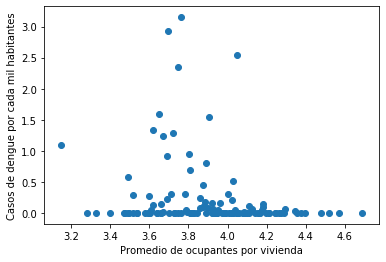

In [13]:
plt.scatter(df3['promedio_habsxviv'], df3['casosxmilhabs'])
plt.xlabel("Promedio de ocupantes por vivienda")
plt.ylabel("Casos de dengue por cada mil habitantes")

Tampoco se observa una relación entre estas variables. Lo que podemos apreciar es que los municipios con un mayor número de casos tienen un promedio de 3.6 a 4 ocupantes por vivienda.

La última celda fue para crear el archivo `dengue0.csv`  con las características socioeconomicas anteriores que es utilizado en la siguiente parte para construir los modelos de ML.

In [17]:
#from pathlib import Path  
#filepath = Path('datos/dengue1.csv')  
#filepath.parent.mkdir(parents=True, exist_ok=True)  
#df3.to_csv(filepath, index=False)  